<div style="border-radius: 15px; border: 2px solid #6A1B9A; padding: 20px; background: linear-gradient(135deg, #9C27B0, #4CAF50); text-align: center; box-shadow: 0px 4px 8px rgba(0, 0, 0, 0.5);">
    <h1 style="color: #ffffff; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7); font-weight: bold; margin-bottom: 10px; font-size: 36px; font-family: 'Roboto', sans-serif;">
        🧠🔁 Ensemble : Decoding Personality Traits 🎭
    </h1>
</div>

<!-- Include Google Fonts for a modern font -->
<link href="https://fonts.googleapis.com/css2?family=Roboto:wght@700&display=swap" rel="stylesheet">

This notebook presents a comprehensive approach to **classifying individuals as Introverts or Extroverts** based on key **behavioral and psychological attributes**. By leveraging features such as event attendance, social media activity, and emotional responses, we build a predictive model that distinguishes between personality types.

The analysis is based on the **Kaggle Playground Series – Season 5, Episode 7** challenge:
🎯 *“Predict the Introverts from the Extroverts.”*

### 📂 Dataset Overview

The project utilizes three related datasets to drive the modeling pipeline:

* **Original Dataset** *(2,900 rows × 8 columns)*
  A well-balanced dataset containing real-world behavioral observations, including the `Personality` label. Used as a benchmark for understanding feature distributions and initial trends.

* **Train Dataset** *(18,524 rows × 9 columns)*
  A larger, labeled dataset used for training. It includes an `id`, a comprehensive set of behavioral features, and the `Personality` target. This may include synthetic or augmented samples.

* **Test Dataset** *(6,175 rows × 8 columns)*
  An unlabeled dataset structured similarly to the training set, excluding the target variable. Used for final model inference and competition submission.

### 🔎 Feature Summary

| **Feature**                 | **Type**              | **Description**                               |
| --------------------------- | --------------------- | --------------------------------------------- |
| `Time_spent_Alone`          | Numerical (discrete)  | Hours spent alone daily *(0–11)*              |
| `Stage_fear`                | Categorical (nominal) | Indicates presence of stage fright *(Yes/No)* |
| `Social_event_attendance`   | Numerical (discrete)  | Frequency of attending social events *(0–10)* |
| `Going_outside`             | Numerical (discrete)  | Frequency of going outdoors *(0–7)*           |
| `Drained_after_socializing` | Categorical (nominal) | Feels drained after socializing *(Yes/No)*    |
| `Friends_circle_size`       | Numerical (discrete)  | Number of close friends *(0–15)*              |
| `Post_frequency`            | Numerical (discrete)  | Frequency of social media posts *(0–10)*      |
| `Personality`               | Categorical (target)  | Target variable: *Introvert* or *Extrovert*   |

> ℹ️ These features reflect social interaction patterns, emotional tendencies, and lifestyle behaviors relevant to personality assessment.

### 🎯 Project Objectives

The primary goal is to develop a robust and interpretable classification model that predicts whether an individual is an **Introvert** or **Extrovert**, based on behavioral and psychological indicators. 

Key steps include:

1. 🧹 **Data Cleaning & Preprocessing**
   Handling missing values, encoding categorical variables, and preparing features.

2. 📊 **Exploratory Data Analysis (EDA)**
   Uncovering patterns, trends, and relationships between features and the target variable.

3. 🤖 **Model Building with Ensemble Techniques**
   Training various ensemble models and evaluating performance.

4. ⚙️ **Hyperparameter Optimization using Optuna**
   Fine-tuning model parameters for optimal performance.

5. 📈 **Performance Evaluation & Visualization**
   Assessing model metrics and visualizing results.

6. 📤 **Final Prediction & Submission**
   Generating predictions for the test set for competition submission.


# <span style="color:transparent;">📁 Data Preparation & Preprocessing</span>

<div style="border-radius: 15px; border: 2px solid #6A1B9A; padding: 10px; background: linear-gradient(135deg, #9C27B0, #4CAF50); text-align: center; box-shadow: 0px 4px 8px rgba(0, 0, 0, 0.5);">
    <h1 style="color: #ffffff; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7); font-weight: bold; margin-bottom: 5px; font-size: 28px; font-family: 'Roboto', sans-serif;">
        📁 Data Preparation & Preprocessing
    </h1>
</div>

<!-- Include Google Fonts for a modern font -->
<link href="https://fonts.googleapis.com/css2?family=Roboto:wght@700&display=swap" rel="stylesheet">


This section covers the **systematic process of preparing the data** for downstream modeling. The goal is to ensure the datasets are **clean, complete, and consistently formatted**, with all missing values handled and features encoded.

# <span style="color:transparent;">Imports & Configuration</span>

<div style="border-radius: 15px; border: 2px solid #6A1B9A; padding: 10px; background: linear-gradient(135deg, #9C27B0, #4CAF50); text-align: center; box-shadow: 0px 4px 8px rgba(0, 0, 0, 0.5);">
    <h1 style="color: #ffffff; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7); font-weight: bold; margin-bottom: 5px; font-size: 28px; font-family: 'Roboto', sans-serif;">
        Imports & Configuration
    </h1>
</div>

<!-- Include Google Fonts for a modern font -->
<link href="https://fonts.googleapis.com/css2?family=Roboto:wght@700&display=swap" rel="stylesheet">


We import all the required libraries for data processing, visualization, and modeling.

A custom Seaborn style is applied for **consistent, clean visuals**, and warnings are suppressed for readability.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

from sklearn.model_selection import StratifiedKFold, train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from xgboost import XGBClassifier, plot_importance as xgb_plot_importance
from lightgbm import LGBMClassifier, plot_importance as lgbm_plot_importance
from catboost import CatBoostClassifier
from sklearn.ensemble import VotingClassifier, HistGradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.inspection import permutation_importance
import optuna
from optuna.samplers import TPESampler
import time

warnings.filterwarnings("ignore")

palette = sns.color_palette("PRGn", 10)
sns.set_palette(palette)
sns.set_style("whitegrid", {
    'grid.color': '.7',
    'grid.linestyle': ':',
    'grid.linewidth': 0.7
})

# <span style="color:transparent;">Load Datasets</span>

<div style="border-radius: 15px; border: 2px solid #6A1B9A; padding: 10px; background: linear-gradient(135deg, #9C27B0, #4CAF50); text-align: center; box-shadow: 0px 4px 8px rgba(0, 0, 0, 0.5);">
    <h1 style="color: #ffffff; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7); font-weight: bold; margin-bottom: 5px; font-size: 28px; font-family: 'Roboto', sans-serif;">
        Load Datasets
    </h1>
</div>

<!-- Include Google Fonts for a modern font -->
<link href="https://fonts.googleapis.com/css2?family=Roboto:wght@700&display=swap" rel="stylesheet">


- We load three datasets:
  - `train.csv`: Features and target labels
  - `test.csv`: Features only
  - `personality_datasert.csv`: Supplemental dataset for imputation and enrichment

In [2]:
train_df = pd.read_csv("/kaggle/input/playground-series-s5e7/train.csv")
test_df = pd.read_csv("/kaggle/input/playground-series-s5e7/test.csv")
original_df = pd.read_csv("/kaggle/input/extrovert-vs-introvert-behavior-data-backup/personality_datasert.csv")

print("Loaded Datasets:")

Loaded Datasets:


# <span style="color:transparent;">Exploratory Data Analysis (EDA)</span>

<div style="border-radius: 15px; border: 2px solid #6A1B9A; padding: 10px; background: linear-gradient(135deg, #9C27B0, #4CAF50); text-align: center; box-shadow: 0px 4px 8px rgba(0, 0, 0, 0.5);">
    <h1 style="color: #ffffff; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7); font-weight: bold; margin-bottom: 5px; font-size: 28px; font-family: 'Roboto', sans-serif;">
        Exploratory Data Analysis (EDA)
    </h1>
</div>

<!-- Include Google Fonts for a modern font -->
<link href="https://fonts.googleapis.com/css2?family=Roboto:wght@700&display=swap" rel="stylesheet">


Steps include:

1. **Inspecting dataset structure** – Checking dtypes, shape, and completeness.
2. **Summarizing missing values & duplicates** across all datasets.
3. **Target variable distribution** – Comparing personality class balance between train and supplemental data.
4. **Descriptive statistics** – For both numerical and categorical variables.
5. **Feature-level summaries by target class** – Exploring group differences.
6. **Correlation analysis** – Examining relationships across numerical features and comparing correlation structures between datasets.
7. **Missingness patterns** – Correlating where missingness might carry predictive information.

## Inspecting Dataset Structure

In [3]:
print("\nOriginal Data Info:")
original_df.info()
print("\nTrain Data Info:")
train_df.info()
print("\nTest Data Info:")
test_df.info()


Original Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2900 entries, 0 to 2899
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Time_spent_Alone           2900 non-null   float64
 1   Stage_fear                 2900 non-null   object 
 2   Social_event_attendance    2900 non-null   float64
 3   Going_outside              2900 non-null   float64
 4   Drained_after_socializing  2900 non-null   object 
 5   Friends_circle_size        2900 non-null   float64
 6   Post_frequency             2900 non-null   float64
 7   Personality                2900 non-null   object 
dtypes: float64(5), object(3)
memory usage: 181.4+ KB

Train Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18524 entries, 0 to 18523
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id              

- The **original dataset** contains 2,900 fully populated rows with 5 numerical and 3 categorical columns.
- The **train dataset** is larger (~18,500 rows) but contains missing values in several key features (up to ~10% missing in some categorical columns).
- The **test dataset** has ~6,100 rows and similar missing data patterns.
- All datasets have a mix of numeric and categorical variables, requiring appropriate preprocessing.

## Missing Values & Duplicate Records Summary

In [4]:
def missing_values_summary(df, dataset_name="Dataset"):
    missing_count = df.isnull().sum()
    missing_pct = 100 * missing_count / len(df)
    data_types = df.dtypes
    summary_df = pd.DataFrame({
        "Missing Count": missing_count,
        "Missing %": missing_pct.round(2),
        "Dtype": data_types
    }).sort_values(by="Missing %", ascending=False)
    
    print(f"\nMissing Values Report — {dataset_name}")
    print(f"Total missing entries: {missing_count.sum()}\n")
    display(summary_df)
    return summary_df

def check_duplicates(df, dataset_name="Dataset"):
    dup_count = df.duplicated().sum()
    print(f"\nDuplicate Rows Report — {dataset_name}")
    print(f"Total duplicate rows: {dup_count}\n")
    
    if dup_count > 0:
        print("Sample duplicate rows (first 5):")
        display(df[df.duplicated()].head())
    return dup_count

train_missing_summary = missing_values_summary(train_df, "Train Dataset")
train_duplicates = check_duplicates(train_df, "Train Dataset")

test_missing_summary = missing_values_summary(test_df, "Test Dataset")
test_duplicates = check_duplicates(test_df, "Test Dataset")

original_missing_summary = missing_values_summary(original_df, "Original Dataset")
original_duplicates = check_duplicates(original_df, "Original Dataset")


Missing Values Report — Train Dataset
Total missing entries: 9196



,Missing Count,Missing %,Dtype
Stage_fear,1893,10.22,object
Going_outside,1466,7.91,float64
Post_frequency,1264,6.82,float64
Time_spent_Alone,1190,6.42,float64
Social_event_attendance,1180,6.37,float64
Drained_after_socializing,1149,6.20,object
Friends_circle_size,1054,5.69,float64
id,0,0.00,int64
Personality,0,0.00,object



Duplicate Rows Report — Train Dataset
Total duplicate rows: 0


Missing Values Report — Test Dataset
Total missing entries: 3076



,Missing Count,Missing %,Dtype
Stage_fear,598,9.68,object
Going_outside,466,7.55,float64
Drained_after_socializing,432,7.00,object
Time_spent_Alone,425,6.88,float64
Post_frequency,408,6.61,float64
Social_event_attendance,397,6.43,float64
Friends_circle_size,350,5.67,float64
id,0,0.00,int64



Duplicate Rows Report — Test Dataset
Total duplicate rows: 0


Missing Values Report — Original Dataset
Total missing entries: 0



,Missing Count,Missing %,Dtype
Time_spent_Alone,0,0.0,float64
Stage_fear,0,0.0,object
Social_event_attendance,0,0.0,float64
Going_outside,0,0.0,float64
Drained_after_socializing,0,0.0,object
Friends_circle_size,0,0.0,float64
Post_frequency,0,0.0,float64
Personality,0,0.0,object



Duplicate Rows Report — Original Dataset
Total duplicate rows: 402

Sample duplicate rows (first 5):


,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
47,10.0,Yes,1.0,2.0,Yes,2.0,0.0,Introvert
217,5.0,Yes,2.0,0.0,Yes,2.0,0.0,Introvert
246,9.0,Yes,0.0,1.0,Yes,2.0,1.0,Introvert
248,9.0,Yes,0.0,2.0,Yes,3.0,2.0,Introvert
254,7.0,Yes,0.0,0.0,Yes,3.0,2.0,Introvert


- Missing values are prevalent mostly in social and behavior-related features like `Stage_fear`, `Going_outside`, and `Post_frequency`.
- Missing percentage is higher for categorical variables (`Stage_fear` up to ~10% in train, 9.7% in test).
- No duplicates detected in the train and test sets, ensuring data uniqueness.
- The original dataset is complete but contains 402 duplicates.

## Target Variable Distribution

In [5]:
def target_distribution_summary(df, target_col='Personality'):
    counts = df[target_col].value_counts(dropna=False)
    percent = round(100 * counts / counts.sum(), 2)
    summary_df = pd.DataFrame({'Count': counts, 'Percentage (%)': percent})
    return summary_df

def print_target_comparison(df1, name1, df2, name2, target_col='Personality'):
    dist1 = target_distribution_summary(df1, target_col)
    dist2 = target_distribution_summary(df2, target_col)
    print(f"\nTarget Distribution - {name1}")
    display(dist1)
    print(f"\nTarget Distribution - {name2}")
    display(dist2)

print_target_comparison(train_df, 'Train Data', original_df, 'Original Data', target_col='Personality')


Target Distribution - Train Data


,Count,Percentage (%)
Personality,,
Extrovert,13699,73.95
Introvert,4825,26.05



Target Distribution - Original Data


,Count,Percentage (%)
Personality,,
Extrovert,1491,51.41
Introvert,1409,48.59


- In the **train dataset**, the class distribution is imbalanced with ~74% Extroverts and ~26% Introverts.
- In the **original dataset**, the personality classes are more balanced (~51% Extroverts, ~49% Introverts).
- This difference impacts model training and necessitates class imbalance handling.


## Descriptive Statistics (numerical and categorical)

In [6]:
print("\nOriginal Data Describe (Numerical):")
display(original_df.describe().T)
print("\nTrain Data Describe (Numerical):")
display(train_df.describe().T)
print("\nTest Data Describe (Numerical):")
display(test_df.describe().T)

print("\nOriginal Data Describe (Categorical):")
display(original_df.describe(include=['object', 'category']).T)
print("\nTrain Data Describe (Categorical):")
display(train_df.describe(include=['object', 'category']).T)
print("\nTest Data Describe (Categorical):")
display(test_df.describe(include=['object', 'category']).T)


Original Data Describe (Numerical):


,count,mean,std,min,25%,50%,75%,max
Time_spent_Alone,2900.0,4.505816,3.441180,0.0,2.0,4.000000,7.0,11.0
Social_event_attendance,2900.0,3.963354,2.872608,0.0,2.0,3.963354,6.0,10.0
Going_outside,2900.0,3.000000,2.221597,0.0,1.0,3.000000,5.0,7.0
Friends_circle_size,2900.0,6.268863,4.232340,0.0,3.0,5.000000,10.0,15.0
Post_frequency,2900.0,3.564727,2.893587,0.0,1.0,3.000000,6.0,10.0



Train Data Describe (Numerical):


,count,mean,std,min,25%,50%,75%,max
id,18524.0,9261.500000,5347.562529,0.0,4630.75,9261.5,13892.25,18523.0
Time_spent_Alone,17334.0,3.137764,3.003786,0.0,1.00,2.0,4.00,11.0
Social_event_attendance,17344.0,5.265106,2.753359,0.0,3.00,5.0,8.00,10.0
Going_outside,17058.0,4.044319,2.062580,0.0,3.00,4.0,6.00,7.0
Friends_circle_size,17470.0,7.996737,4.223484,0.0,5.00,8.0,12.00,15.0
Post_frequency,17260.0,4.982097,2.879139,0.0,3.00,5.0,7.00,10.0



Test Data Describe (Numerical):


,count,mean,std,min,25%,50%,75%,max
id,6175.0,21611.000000,1782.713288,18524.0,20067.5,21611.0,23154.5,24698.0
Time_spent_Alone,5750.0,3.116870,2.985658,0.0,1.0,2.0,4.0,11.0
Social_event_attendance,5778.0,5.287989,2.758052,0.0,3.0,5.0,8.0,10.0
Going_outside,5709.0,4.037835,2.045207,0.0,3.0,4.0,6.0,7.0
Friends_circle_size,5825.0,8.008412,4.192701,0.0,5.0,8.0,12.0,15.0
Post_frequency,5767.0,5.028958,2.867285,0.0,3.0,5.0,7.0,10.0



Original Data Describe (Categorical):


,count,unique,top,freq
Stage_fear,2900,2,No,1490
Drained_after_socializing,2900,2,No,1493
Personality,2900,2,Extrovert,1491



Train Data Describe (Categorical):


,count,unique,top,freq
Stage_fear,16631,2,No,12609
Drained_after_socializing,17375,2,No,13313
Personality,18524,2,Extrovert,13699



Test Data Describe (Categorical):


,count,unique,top,freq
Stage_fear,5577,2,No,4236
Drained_after_socializing,5743,2,No,4437


- Numerical features show notable differences by personality:
  - Introverts **spend significantly more time alone** (mean \~7 hours) versus Extroverts (\~1.7–2.1 hours).
  - Extroverts show higher mean levels in social engagement features like event attendance, going outside, friends circle size, and post frequency.
- Categorical features (`Stage_fear`, `Drained_after_socializing`) covary well with personality:
  - Extroverts predominantly answer "No" for these social anxiety/fatigue-related questions.
  - Introverts mostly answer "Yes", aligning with psychological expectations.

## Numerical Feature Statistics by Target Group

In [7]:
def numerical_describe_by_group(df, group_col='Personality'):
    print(f"\nDescriptive Statistics Grouped by '{group_col}'")
    display(df.groupby(group_col).describe().transpose())

numerical_describe_by_group(train_df, group_col='Personality')
numerical_describe_by_group(original_df, group_col='Personality')


Descriptive Statistics Grouped by 'Personality'


Personality                       Extrovert     Introvert
id                      count  13699.000000   4825.000000
                        mean    9256.820206   9274.786736
                        std     5352.530063   5333.965058
                        min        0.000000      2.000000
                        25%     4613.500000   4679.000000
                        50%     9231.000000   9352.000000
                        75%    13900.500000  13874.000000
                        max    18523.000000  18522.000000
Time_spent_Alone        count  12790.000000   4544.000000
                        mean       1.747146      7.051937
                        std        1.537609      2.645865
                        min        0.000000      0.000000
                        25%        1.000000      5.000000
                        50%        2.000000      7.000000
                        75%        3.000000      9.000000
                        max       11.000000     11.000000
Social_event_attendance count  12967.000000   4377.000000
                        mean       6.389450      1.934202
                        std        2.020741      1.761425
                        min        0.000000      0.000000
                        25%        5.000000      1.000000
                        50%        6.000000      2.000000
                        75%        8.000000      3.000000
                        max       10.000000     10.000000
Going_outside           count  12737.000000   4321.000000
                        mean       4.895894      1.534136
                        std        1.434279      1.513918
                        min        0.000000      0.000000
                        25%        4.000000      0.000000
                        50%        5.000000      1.000000
                        75%        6.000000      2.000000
                        max        7.000000      7.000000
Friends_circle_size     count  12999.000000   4471.000000
                        mean       9.624587      3.263923
                        std        3.347242      2.649747
                        min        0.000000      0.000000
                        25%        7.000000      1.000000
                        50%       10.000000      3.000000
                        75%       12.000000      4.000000
                        max       15.000000     15.000000
Post_frequency          count  12922.000000   4338.000000
                        mean       6.113682      1.611342
                        std        2.225713      1.746218
                        min        0.000000      0.000000
                        25%        4.000000      0.000000
                        50%        6.000000      1.000000
                        75%        8.000000      2.000000
                        max       10.000000     10.000000


Descriptive Statistics Grouped by 'Personality'


Personality                      Extrovert    Introvert
Time_spent_Alone        count  1491.000000  1409.000000
                        mean      2.122869     7.027444
                        std       2.213591     2.611484
                        min       0.000000     0.000000
                        25%       1.000000     5.000000
                        50%       2.000000     7.000000
                        75%       3.000000     9.000000
                        max      11.000000    11.000000
Social_event_attendance count  1491.000000  1409.000000
                        mean      5.977850     1.831621
                        std       2.208496     1.727352
                        min       0.000000     0.000000
                        25%       4.000000     1.000000
                        50%       6.000000     2.000000
                        75%       8.000000     3.000000
                        max      10.000000     9.000000
Going_outside           count  1491.000000  1409.000000
                        mean      4.596244     1.310859
                        std       1.593809     1.385765
                        min       0.000000     0.000000
                        25%       4.000000     0.000000
                        50%       5.000000     1.000000
                        75%       6.000000     2.000000
                        max       7.000000     7.000000
Friends_circle_size     count  1491.000000  1409.000000
                        mean      9.095744     3.277465
                        std       3.486378     2.569335
                        min       0.000000     0.000000
                        25%       6.268863     2.000000
                        50%       9.000000     3.000000
                        75%      12.000000     4.000000
                        max      15.000000    14.000000
Post_frequency          count  1491.000000  1409.000000
                        mean      5.592647     1.418787
                        std       2.335500     1.582346
                        min       0.000000     0.000000
                        25%       4.000000     0.000000
                        50%       6.000000     1.000000
                        75%       7.000000     2.000000
                        max      10.000000     9.000000

## Categorical Feature Statistics by Target Group

In [8]:
def categorical_describe_by_group(df, group_col='Personality'):
    cat_cols = df.select_dtypes(include=['object', 'category']).columns.to_list()
    
    print(f"\nDescriptive Statistics of Categorical Features Grouped by '{group_col}':")
    desc = df.groupby(group_col)[cat_cols].describe().transpose()
    display(desc)

categorical_describe_by_group(train_df, group_col='Personality')
categorical_describe_by_group(original_df, group_col='Personality')


Descriptive Statistics of Categorical Features Grouped by 'Personality':


Personality                       Extrovert  Introvert
Stage_fear                count       12550       4081
                          unique          2          2
                          top            No        Yes
                          freq        12314       3786
Drained_after_socializing count       13237       4138
                          unique          2          2
                          top            No        Yes
                          freq        13001       3826
Personality               count       13699       4825
                          unique          1          1
                          top     Extrovert  Introvert
                          freq        13699       4825


Descriptive Statistics of Categorical Features Grouped by 'Personality':


Personality                       Extrovert  Introvert
Stage_fear                count        1491       1409
                          unique          2          2
                          top            No        Yes
                          freq         1380       1299
Drained_after_socializing count        1491       1409
                          unique          2          2
                          top            No        Yes
                          freq         1380       1296
Personality               count        1491       1409
                          unique          1          1
                          top     Extrovert  Introvert
                          freq         1491       1409

## Missing Values by Target Group

In [9]:
def missing_by_group(df, group_col='Personality'):
    group_counts = df[group_col].value_counts(dropna=False)
    summary = {}
    dtypes = df.dtypes
    for group in group_counts.index:
        group_df = df[df[group_col] == group]
        total = len(group_df)
        missing_count = group_df.isnull().sum()
        missing_pct = 100 * missing_count / total
        summary[group] = pd.DataFrame({
            'Missing Count': missing_count,
            'Missing %': missing_pct.round(2),
            'Dtype': dtypes
        })
    return summary

result = missing_by_group(train_df, group_col='Personality')
for personality_type, table in result.items():
    print(f"\nMissing Value Summary for Personality: {personality_type}")
    display(table[table['Missing Count'] > 0])


Missing Value Summary for Personality: Extrovert


,Missing Count,Missing %,Dtype
Time_spent_Alone,909,6.64,float64
Stage_fear,1149,8.39,object
Social_event_attendance,732,5.34,float64
Going_outside,962,7.02,float64
Drained_after_socializing,462,3.37,object
Friends_circle_size,700,5.11,float64
Post_frequency,777,5.67,float64



Missing Value Summary for Personality: Introvert


,Missing Count,Missing %,Dtype
Time_spent_Alone,281,5.82,float64
Stage_fear,744,15.42,object
Social_event_attendance,448,9.28,float64
Going_outside,504,10.45,float64
Drained_after_socializing,687,14.24,object
Friends_circle_size,354,7.34,float64
Post_frequency,487,10.09,float64


- Missing data rates vary by personality.
- Missingness tends to be higher among Introverts, especially in `Stage_fear` (15.4%) and `Drained_after_socializing` (14.2%), reflecting possible data collection or behavioral patterns.
- Missingness itself may carry useful predictive information and requires careful imputation.

## Correlation Analysis 

In [10]:
def correlation_summary(df, dataset_name):
    numeric_df = df.select_dtypes(include=['number'])
    
    print(f"\nCorrelation Matrix - {dataset_name}\n")
    corr_matrix = numeric_df.corr(method='pearson')
    display(corr_matrix.round(3))
    return corr_matrix

train_corr = correlation_summary(train_df, "Train Dataset")
original_corr = correlation_summary(original_df, "Original Dataset")


Correlation Matrix - Train Dataset



,id,Time_spent_Alone,Social_event_attendance,Going_outside,Friends_circle_size,Post_frequency
id,1.000,-0.000,0.003,0.004,0.004,-0.002
Time_spent_Alone,-0.000,1.000,-0.629,-0.641,-0.598,-0.612
Social_event_attendance,0.003,-0.629,1.000,0.585,0.567,0.567
Going_outside,0.004,-0.641,0.585,1.000,0.550,0.579
Friends_circle_size,0.004,-0.598,0.567,0.550,1.000,0.522
Post_frequency,-0.002,-0.612,0.567,0.579,0.522,1.000



Correlation Matrix - Original Dataset



,Time_spent_Alone,Social_event_attendance,Going_outside,Friends_circle_size,Post_frequency
Time_spent_Alone,1.000,-0.718,-0.735,-0.702,-0.718
Social_event_attendance,-0.718,1.000,0.732,0.719,0.728
Going_outside,-0.735,0.732,1.000,0.718,0.755
Friends_circle_size,-0.702,0.719,0.718,1.000,0.690
Post_frequency,-0.718,0.728,0.755,0.690,1.000


- Strong negative correlations (~–0.6 to –0.7) between `Time_spent_Alone` and social activity metrics (`Social_event_attendance`, `Going_outside`, etc.) affirm intuitive behavioral contrasts.
- Positive correlations among social features (0.5 to 0.7 range) indicate consistent social behavior patterns.
- Correlation differences between train and original datasets imply some distributional shift, which should be considered to ensure model generalizability.

## Compare Correlations between Datasets

In [11]:
def compare_correlation(df1, name1, df2, name2):
    # Drop 'id' if exists and select numeric columns
    corr1 = df1.drop(columns=['id'], errors='ignore').select_dtypes(include=['number']).corr()
    corr2 = df2.drop(columns=['id'], errors='ignore').select_dtypes(include=['number']).corr()
    diff = (corr1 - corr2).abs()
    
    print(f"\nDifference in correlations: {name1} vs {name2}\n")
    display(diff.round(3))
    return diff

corr_diff = compare_correlation(train_df, "Train Dataset", original_df, "Original Dataset")


Difference in correlations: Train Dataset vs Original Dataset



,Time_spent_Alone,Social_event_attendance,Going_outside,Friends_circle_size,Post_frequency
Time_spent_Alone,0.000,0.089,0.094,0.104,0.107
Social_event_attendance,0.089,0.000,0.147,0.152,0.161
Going_outside,0.094,0.147,0.000,0.168,0.175
Friends_circle_size,0.104,0.152,0.168,0.000,0.168
Post_frequency,0.107,0.161,0.175,0.168,0.000


- Absolute correlation differences between train and backup datasets are modest (<0.18), indicating overall dataset alignment.
- Slight variation warrants considering datasets complementary rather than identical.

## Missingness Correlation

In [12]:
def missingness_correlation(df, dataset_name):
    numeric_df = df.select_dtypes(include=['number'])
    
    # Boolean DataFrame: True if missing
    missing_bool = numeric_df.isnull()
    
    print(f"\nMissing Value Correlation Matrix - {dataset_name}\n"
          "(Correlation between missing/not missing indicators per feature pair)")
    
    corr_missing = missing_bool.corr(method='pearson')
    display(corr_missing.round(3))
    
    return corr_missing

train_missing_corr = missingness_correlation(train_df, "Train Dataset")


Missing Value Correlation Matrix - Train Dataset
(Correlation between missing/not missing indicators per feature pair)


,id,Time_spent_Alone,Social_event_attendance,Going_outside,Friends_circle_size,Post_frequency
id,NaN,NaN,NaN,NaN,NaN,NaN
Time_spent_Alone,NaN,1.000,-0.031,-0.035,-0.029,-0.025
Social_event_attendance,NaN,-0.031,1.000,-0.035,-0.019,-0.034
Going_outside,NaN,-0.035,-0.035,1.000,-0.029,-0.037
Friends_circle_size,NaN,-0.029,-0.019,-0.029,1.000,-0.022
Post_frequency,NaN,-0.025,-0.034,-0.037,-0.022,1.000


# <span style="color:transparent;">Data Preprocessing</span>

<div style="border-radius: 15px; border: 2px solid #6A1B9A; padding: 10px; background: linear-gradient(135deg, #9C27B0, #4CAF50); text-align: center; box-shadow: 0px 4px 8px rgba(0, 0, 0, 0.5);">
    <h1 style="color: #ffffff; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7); font-weight: bold; margin-bottom: 5px; font-size: 28px; font-family: 'Roboto', sans-serif;">
        Data Preprocessing
    </h1>
</div>

<!-- Include Google Fonts for a modern font -->
<link href="https://fonts.googleapis.com/css2?family=Roboto:wght@700&display=swap" rel="stylesheet">


## Merge Personality Labels

We enrich train and test sets by merging the **`match_p`** label from the external dataset (used **only** for imputation, not as a target to avoid leakage).

* Duplicates are removed to enforce a one-to-one or one-to-none join.
* Post-merge null analysis ensures no unintended data loss.

In [13]:
original_df = (
    original_df
    .rename(columns={'Personality': 'match_p'})
    .drop_duplicates([
        'Time_spent_Alone', 'Stage_fear', 'Social_event_attendance',
        'Going_outside', 'Drained_after_socializing',
        'Friends_circle_size', 'Post_frequency'
    ])
)

merge_cols = [col for col in original_df.columns if col != 'match_p']
train_df = train_df.merge(original_df, how='left', on=merge_cols)
test_df = test_df.merge(original_df, how='left', on=merge_cols)

# After Merging
print("\nNull values after merge (train):")
display(train_df.isnull().sum().to_frame("Missing Values"))
print("\nNull values after merge (test):")
display(test_df.isnull().sum().to_frame("Missing Values"))

print("\ntrain_df info:")
train_df.info()
print("\ntest_df info:")
test_df.info()


Null values after merge (train):


,Missing Values
id,0
Time_spent_Alone,1190
Stage_fear,1893
Social_event_attendance,1180
Going_outside,1466
Drained_after_socializing,1149
Friends_circle_size,1054
Post_frequency,1264
Personality,0
match_p,18346



Null values after merge (test):


,Missing Values
id,0
Time_spent_Alone,425
Stage_fear,598
Social_event_attendance,397
Going_outside,466
Drained_after_socializing,432
Friends_circle_size,350
Post_frequency,408
match_p,6117



train_df info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18524 entries, 0 to 18523
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id                         18524 non-null  int64  
 1   Time_spent_Alone           17334 non-null  float64
 2   Stage_fear                 16631 non-null  object 
 3   Social_event_attendance    17344 non-null  float64
 4   Going_outside              17058 non-null  float64
 5   Drained_after_socializing  17375 non-null  object 
 6   Friends_circle_size        17470 non-null  float64
 7   Post_frequency             17260 non-null  float64
 8   Personality                18524 non-null  object 
 9   match_p                    178 non-null    object 
dtypes: float64(5), int64(1), object(4)
memory usage: 1.4+ MB

test_df info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6175 entries, 0 to 6174
Data columns (total 9 columns):
 #   Column         

## Prepare Data

- Extracted the target variable (`Personality`) and encoded it as:
  - `1` → Extrovert
  - `0` → Introvert
- Removed the `id` columns from both train and test sets.
- Combined train and test sets into a unified `all_data` dataframe to ensure consistent preprocessing.
- Confirmed that no `Personality` values leak into the test portion after merging.

In [14]:
train_ID = train_df.pop('id')
test_ID = test_df.pop('id')
y_train = train_df.pop('Personality').map({'Extrovert': 1, 'Introvert': 0}).values
ntrain = train_df.shape[0]
all_data = pd.concat([train_df, test_df], axis=0).reset_index(drop=True)
all_data.drop(columns='Personality', inplace=True, errors='ignore')

# After Preparing all_data
print("\nSample of combined data:")
display(all_data.head())

print("\nall_data info:")
all_data.info()

target_dist = pd.Series(y_train).value_counts(normalize=True) * 100
print("\nTarget Variable Distribution (%):")
for cls, pct in target_dist.items():
    print(f"  - Class {cls}: {pct:.2f}%")


Sample of combined data:


,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,match_p
0,0.0,No,6.0,4.0,No,15.0,5.0,NaN
1,1.0,No,7.0,3.0,No,10.0,8.0,NaN
2,6.0,Yes,1.0,0.0,NaN,3.0,0.0,NaN
3,3.0,No,7.0,3.0,No,11.0,5.0,NaN
4,1.0,No,4.0,4.0,No,13.0,NaN,NaN



all_data info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24699 entries, 0 to 24698
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Time_spent_Alone           23084 non-null  float64
 1   Stage_fear                 22208 non-null  object 
 2   Social_event_attendance    23122 non-null  float64
 3   Going_outside              22767 non-null  float64
 4   Drained_after_socializing  23118 non-null  object 
 5   Friends_circle_size        23295 non-null  float64
 6   Post_frequency             23027 non-null  float64
 7   match_p                    236 non-null    object 
dtypes: float64(5), object(3)
memory usage: 1.5+ MB

Target Variable Distribution (%):
  - Class 1: 73.95%
  - Class 0: 26.05%


➡️ This imbalance will be handled explicitly during modeling using model-specific weight strategies.

## Missing Value Imputation Strategy

We use **quantile-based group median imputation** to preserve feature relationships, filling missing values sequentially:

-  `fill_missing_by_quantile_group()` bins a related (grouping) feature into quantiles, then imputes missing values in the target feature using the **median of that target within each quantile group**. This approach preserves natural correlations between features.

- To maximize data quality and consistency with underlying behavior patterns, missing values were filled in this sequence:
  1. Time_spent_Alone (grouped by Social_event_attendance, Going_outside)
  2. Social_event_attendance (grouped by Going_outside, Friends_circle_size, Post_frequency)
  3. Friends_circle_size (grouped by Post_frequency, Going_outside, Social_event_attendance)
  4. Post_frequency (grouped by Friends_circle_size, Time_spent_Alone)
  5. Going_outside (grouped by Friends_circle_size, Post_frequency)

Categorical columns `Stage_fear` and `Drained_after_socializing` are imputed with `"Unknown"`.

In [15]:
def fill_missing_by_quantile_group(df, group_source_col, target_col, quantiles=[0, 0.25, 0.5, 0.75, 1.0], labels=None):
    if labels is None:
        labels = [f'Q{i+1}' for i in range(len(quantiles) - 1)]
    bin_col = f'{group_source_col}_bin'
    df[bin_col] = pd.qcut(df[group_source_col], q=quantiles, labels=labels)
    df[target_col] = df[target_col].fillna(df.groupby(bin_col)[target_col].transform('median'))
    df.drop(columns=[bin_col], inplace=True)
    return df

### Group-wise Missing Value Imputation

In [16]:
# Time_spent_Alone
for source in ['Social_event_attendance', 'Going_outside']:
    all_data = fill_missing_by_quantile_group(all_data, source, 'Time_spent_Alone')
print("Filled Time_spent_Alone missing values")
print(all_data['Time_spent_Alone'].isnull().value_counts(), "\n")

# Social_event_attendance
for source in ['Going_outside', 'Friends_circle_size', 'Post_frequency']:
    all_data = fill_missing_by_quantile_group(all_data, source, 'Social_event_attendance')
print("Filled Social_event_attendance missing values")
print(all_data['Social_event_attendance'].isnull().value_counts(), "\n")

# Friends_circle_size
for source in ['Post_frequency', 'Going_outside', 'Social_event_attendance']:
    all_data = fill_missing_by_quantile_group(all_data, source, 'Friends_circle_size')
print("Filled Friends_circle_size missing values")
print(all_data['Friends_circle_size'].isnull().value_counts(), "\n")

# Post_frequency
all_data = fill_missing_by_quantile_group(all_data, 'Friends_circle_size', 'Post_frequency')
all_data = fill_missing_by_quantile_group(all_data, 'Time_spent_Alone', 'Post_frequency')
print("Filled Post_frequency missing values")
print(all_data['Post_frequency'].isnull().value_counts(), "\n")

# Going_outside (final pass)
for source in ['Friends_circle_size', 'Post_frequency']:
    all_data = fill_missing_by_quantile_group(all_data, source, 'Going_outside')
print("Final pass on Going_outside")
print(all_data['Going_outside'].isnull().value_counts(), "\n")

# Final fill for categorical columns
all_data.fillna({
    'Stage_fear': 'Unknown',
    'Drained_after_socializing': 'Unknown'
}, inplace=True)
print("Filled missing categorical values")
print(all_data[['Stage_fear', 'Drained_after_socializing']].isnull().sum(), "\n")

# Verify There Are No Missing Values
print("Data Overview after Imputation:")
all_data.info()

Filled Time_spent_Alone missing values
Time_spent_Alone
False    24699
Name: count, dtype: int64 

Filled Social_event_attendance missing values
Social_event_attendance
False    24699
Name: count, dtype: int64 

Filled Friends_circle_size missing values
Friends_circle_size
False    24699
Name: count, dtype: int64 

Filled Post_frequency missing values
Post_frequency
False    24699
Name: count, dtype: int64 

Final pass on Going_outside
Going_outside
False    24699
Name: count, dtype: int64 

Filled missing categorical values
Stage_fear                   0
Drained_after_socializing    0
dtype: int64 

Data Overview after Imputation:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24699 entries, 0 to 24698
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Time_spent_Alone           24699 non-null  float64
 1   Stage_fear                 24699 non-null  object 
 2   Social_event_attendance

## Categorical Encoding

We apply **one-hot encoding** to:
* `Stage_fear`
* `Drained_after_socializing`
* `match_p` (merged personality label)
  
Ensures all features are **numeric** and **model-ready**.

In [17]:
all_data = pd.get_dummies(all_data, columns=[
    'Stage_fear', 'Drained_after_socializing', 'match_p'
], prefix=['Stage', 'Drained', 'match'])

print("One-hot encoded categorical columns")
print("Final Columns:")
print(all_data.columns.tolist())

# Verify completeness—should be no missing values and all columns are now numeric or bool
print("\nData Overview after One-Hot Encoding:")
all_data.info()


One-hot encoded categorical columns
Final Columns:
['Time_spent_Alone', 'Social_event_attendance', 'Going_outside', 'Friends_circle_size', 'Post_frequency', 'Stage_No', 'Stage_Unknown', 'Stage_Yes', 'Drained_No', 'Drained_Unknown', 'Drained_Yes', 'match_Extrovert', 'match_Introvert']

Data Overview after One-Hot Encoding:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24699 entries, 0 to 24698
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Time_spent_Alone         24699 non-null  float64
 1   Social_event_attendance  24699 non-null  float64
 2   Going_outside            24699 non-null  float64
 3   Friends_circle_size      24699 non-null  float64
 4   Post_frequency           24699 non-null  float64
 5   Stage_No                 24699 non-null  bool   
 6   Stage_Unknown            24699 non-null  bool   
 7   Stage_Yes                24699 non-null  bool   
 8   Drained_No            

## Sanity Checks

* A data summary report verifies all features are complete and numeric.
* `assert` checks confirm zero missing values remain.

In [18]:
def final_data_summary(df):
    total_rows = df.shape[0]
    summary = pd.DataFrame({
        'Feature': df.columns,
        'Count': df.count().values,
        'Missing Count': df.isnull().sum().values,
        'Missing %': (df.isnull().sum() / total_rows * 100).round(2).values,
        'Dtype': [str(dtype) for dtype in df.dtypes]
    })
    summary = summary[['Feature', 'Count', 'Missing Count', 'Missing %', 'Dtype']]
    return summary

print("\nFinal Data Summary Check:")
final_summary_df = final_data_summary(all_data)
display(final_summary_df)

# Assert no missing values remain
assert all_data.isnull().sum().sum() == 0, "There are still missing values!"

print("\nNo missing values detected. Data is ready for modeling.")


Final Data Summary Check:


,Feature,Count,Missing Count,Missing %,Dtype
0,Time_spent_Alone,24699,0,0.0,float64
1,Social_event_attendance,24699,0,0.0,float64
2,Going_outside,24699,0,0.0,float64
3,Friends_circle_size,24699,0,0.0,float64
4,Post_frequency,24699,0,0.0,float64
5,Stage_No,24699,0,0.0,bool
6,Stage_Unknown,24699,0,0.0,bool
7,Stage_Yes,24699,0,0.0,bool
8,Drained_No,24699,0,0.0,bool
9,Drained_Unknown,24699,0,0.0,bool



No missing values detected. Data is ready for modeling.


## Dataset Split

- Split the fully preprocessed `all_data` back into input features and target label:
  - `X_train` (features for training)
  - `X_test` (features for final prediction)
  - `y_train` (target labels)
- Ensured row alignment with the original dataset (ntrain as boundary).

In [19]:
X_train = all_data[:ntrain]
X_test = all_data[ntrain:]
X = X_train
y = y_train

## Class Imbalance Handling

- The dataset has ~74% 'Extrovert' in the target, so models may be biased toward the majority class.
- To mitigate this, we explicitly calculate a **`scale_pos_weight`** to emphasize the minority class (Introverts) during training:

#### 📌 Breakdown of Class Imbalance Calculation

| Line                                   | What It Does     | Why It's Useful                      |
| -------------------------------------- | ---------------- | ------------------------------------ |
| `class_1 = y.sum()`                    | Count of class 1 | Needed for imbalance calculation     |
| `class_0 = len(y) - class_1`           | Count of class 0 | Complement of class 1                |
| `scale_pos_weight = class_0 / class_1` | Weight factor    | Penalizes minority class errors more |

#### 📌 Class Imbalance Strategies by Model

- We instantiate five high-performance gradient boosting models, each tuned using Optuna and configured to handle class imbalance natively.

| Model                            | Class Imbalance Handling                   |
| -------------------------------- | ------------------------------------------ |
| `XGBClassifier`                  | `scale_pos_weight=class_0 / class_1`       |
| `CatBoostClassifier`             | `class_weights=[scale_pos_weight, 1]`      |
| `LGBMClassifier` (GBDT)          | `class_weight={0: scale_pos_weight, 1: 1}` |
| `LGBMClassifier` (GOSS)          | `class_weight={0: scale_pos_weight, 1: 1}` |
| `HistGradientBoostingClassifier` | `class_weight='balanced'`                  |

- These configurations ensure that each model gives proportional attention to both personality classes.


In [20]:
class_1 = y.sum()
class_0 = len(y) - class_1
scale_pos_weight = class_0 / class_1

# <span style="color:transparent;">🤖 Modeling & Evaluation (Voting vs Stacking)</span>

<div style="border-radius: 15px; border: 2px solid #6A1B9A; padding: 10px; background: linear-gradient(135deg, #9C27B0, #4CAF50); text-align: center; box-shadow: 0px 4px 8px rgba(0, 0, 0, 0.5);">
    <h1 style="color: #ffffff; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7); font-weight: bold; margin-bottom: 5px; font-size: 28px; font-family: 'Roboto', sans-serif;">
        🤖 Modeling & Evaluation (Voting vs Stacking)
    </h1>
</div>

<!-- Include Google Fonts for a modern font -->
<link href="https://fonts.googleapis.com/css2?family=Roboto:wght@700&display=swap" rel="stylesheet">


Due to the inherent complexity and potential imbalance of the dataset, ensemble learning techniques are utilized to harness the strengths of multiple base learners, thereby enhancing overall predictive performance and generalization.

The process begins with the preparation of the preprocessed data and the addressing of class imbalance through adjustments of `scale_pos_weight` in the configurations of the base models. A diverse array of advanced gradient-boosting algorithms specifically **XGBoost**, **CatBoost**, **LightGBM** (including GBDT and GOSS variants), and **HistGradientBoosting** are selected as base learners, each pre-tuned with optimized hyperparameters.

The heart of this modeling phase involves a direct comparison between two prominent ensemble methodologies:

1. **Stacking:** This advanced technique involves training a meta-model (Logistic Regression) on the out-of-fold (OOF) predictions generated by the base learners. This method allows the meta-model to learn optimal weighting and combination strategies based on the strengths and weaknesses of the base models.
   
2. **Soft Voting:** This simpler yet effective approach combines the predictions of the base models by averaging their predicted probabilities, with the final class determined by the highest average probability.

The aim of this comparative analysis is to identify the most effective ensemble strategy for this specific binary classification task, ultimately leading to a highly accurate and reliable prediction system.

# <span style="color:transparent;">Model Configuration</span>

<div style="border-radius: 15px; border: 2px solid #6A1B9A; padding: 10px; background: linear-gradient(135deg, #9C27B0, #4CAF50); text-align: center; box-shadow: 0px 4px 8px rgba(0, 0, 0, 0.5);">
    <h1 style="color: #ffffff; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7); font-weight: bold; margin-bottom: 5px; font-size: 28px; font-family: 'Roboto', sans-serif;">
        Model Configuration
    </h1>
</div>

<!-- Include Google Fonts for a modern font -->
<link href="https://fonts.googleapis.com/css2?family=Roboto:wght@700&display=swap" rel="stylesheet">


- Loaded 5 base models with **Optuna-tuned parameters**:
  - `XGBoost`
  - `CatBoost`
  - `LightGBM` (both `gbdt` and `goss` boosting types)
  - `HistGradientBoostingClassifier` 
- These models capture diverse decision boundaries due to different learning philosophies.

In [21]:
# Best Trial Parameters (use after Optuna)
best_params_dict = {
    'XGBoost': {
        'max_depth': 10, 
        'learning_rate': 0.013683607181209666, 
        'n_estimators': 735,
        'subsample': 0.8526047335850097, 
        'colsample_bytree': 0.7839342871434789,
        'scale_pos_weight': scale_pos_weight,
        'random_state': 42, 'verbosity': 0, 'n_jobs': -1
    },
    'CatBoost': {
        'iterations': 894, 
        'depth': 6, 
        'learning_rate': 0.015254285834997475,
        'class_weights': [scale_pos_weight, 1],
        'random_seed': 42, 'verbose': 0
    },
    'LightGBM_gbdt': {
        'boosting_type': 'gbdt', 
        'num_leaves': 48, 
        'learning_rate': 0.014034705559998232,
        'n_estimators': 696, 
        'subsample': 0.7586519441655896, 
        'colsample_bytree': 0.82266052103882,
        'class_weight': {0: scale_pos_weight, 1: 1},
        'random_state': 42, 'verbosity': -1
    },
    'LightGBM_goss': {
        'boosting_type': 'goss', 
        'num_leaves': 56, 
        'learning_rate': 0.02046015361791542,
        'n_estimators': 750, 
        'subsample': 0.9276519441655896, 
        'colsample_bytree': 0.7537907009597088,
        'class_weight': {0: scale_pos_weight, 1: 1},
        'random_state': 42, 'verbosity': -1
    },
    'HistGB': {
        'max_iter': 300, 
        'max_depth': 8, 
        'learning_rate': 0.0201942082243779,
        'min_samples_leaf': 20, 
        'class_weight': 'balanced',
        'random_state': 42
    }
}

In [22]:
# Instantiate base learners
xgb = XGBClassifier(**best_params_dict['XGBoost'])
cat = CatBoostClassifier(**best_params_dict['CatBoost'])
lgbm_gbdt = LGBMClassifier(**best_params_dict['LightGBM_gbdt'])
lgbm_goss = LGBMClassifier(**best_params_dict['LightGBM_goss'])
hgb = HistGradientBoostingClassifier(**best_params_dict['HistGB'])

base_models = [
    ('xgb', xgb), ('cat', cat),
    ('lgbm_gbdt', lgbm_gbdt),
    ('lgbm_goss', lgbm_goss),
    ('hgb', hgb)
]

# <span style="color:transparent;">Generate OOF Predictions</span>

<div style="border-radius: 15px; border: 2px solid #6A1B9A; padding: 10px; background: linear-gradient(135deg, #9C27B0, #4CAF50); text-align: center; box-shadow: 0px 4px 8px rgba(0, 0, 0, 0.5);">
    <h1 style="color: #ffffff; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7); font-weight: bold; margin-bottom: 5px; font-size: 28px; font-family: 'Roboto', sans-serif;">
        Generate OOF Predictions
    </h1>
</div>

<!-- Include Google Fonts for a modern font -->
<link href="https://fonts.googleapis.com/css2?family=Roboto:wght@700&display=swap" rel="stylesheet">


In [23]:
def get_oof_predictions_detailed(models, X, y, X_test, n_folds=5):
    skf = StratifiedKFold(n_splits=n_folds, shuffle=True, random_state=42)
    oof_preds = np.zeros((X.shape[0], len(models)))
    test_preds = np.zeros((X_test.shape[0], len(models)))
    rows = []

    for idx, (name, model) in enumerate(models):
        print(f"\nTraining base model: {name}")
        test_fold_preds, fold_val_acc, fold_train_acc = [], [], []
        start = time.time()

        for fold, (train_idx, val_idx) in enumerate(skf.split(X, y)):
            X_tr, X_val = X.iloc[train_idx], X.iloc[val_idx]
            y_tr, y_val = y[train_idx], y[val_idx]
            model.fit(X_tr, y_tr)

            train_acc = accuracy_score(y_tr, model.predict(X_tr))
            val_acc = accuracy_score(y_val, model.predict(X_val))
            fold_train_acc.append(train_acc)
            fold_val_acc.append(val_acc)
            print(f"  Fold {fold+1} - Train: {train_acc:.4f} | Val: {val_acc:.4f}")

            oof_preds[val_idx, idx] = model.predict_proba(X_val)[:, 1]
            test_fold_preds.append(model.predict_proba(X_test)[:, 1])

        end = time.time()
        test_preds[:, idx] = np.mean(test_fold_preds, axis=0)

        row = {
            'Model': name,
            **{f'Fold{i+1}': v for i, v in enumerate(fold_val_acc)},
            'Mean': np.mean(fold_val_acc),
            'Std': np.std(fold_val_acc)
        }
        rows.append(row)

        print(f"{name} - Train Mean: {np.mean(fold_train_acc):.4f} ± {np.std(fold_train_acc):.4f} | "
              f"Val Mean: {np.mean(fold_val_acc):.4f} ± {np.std(fold_val_acc):.4f} | Time: {end-start:.2f}s")

    summary_df = pd.DataFrame(rows)
    return oof_preds, test_preds, summary_df

oof_preds, test_preds, perf_summary = get_oof_predictions_detailed(base_models, X, y, X_test)
print("\nBase Learner Performance Summary (Validation Accuracies):")
display(perf_summary)


Training base model: xgb
  Fold 1 - Train: 0.9737 | Val: 0.9698
  Fold 2 - Train: 0.9740 | Val: 0.9679
  Fold 3 - Train: 0.9750 | Val: 0.9665
  Fold 4 - Train: 0.9736 | Val: 0.9698
  Fold 5 - Train: 0.9729 | Val: 0.9714
xgb - Train Mean: 0.9738 ± 0.0007 | Val Mean: 0.9691 ± 0.0017 | Time: 9.70s

Training base model: cat
  Fold 1 - Train: 0.9730 | Val: 0.9719
  Fold 2 - Train: 0.9740 | Val: 0.9668
  Fold 3 - Train: 0.9740 | Val: 0.9665
  Fold 4 - Train: 0.9734 | Val: 0.9709
  Fold 5 - Train: 0.9723 | Val: 0.9711
cat - Train Mean: 0.9733 ± 0.0006 | Val Mean: 0.9694 ± 0.0023 | Time: 26.54s

Training base model: lgbm_gbdt
  Fold 1 - Train: 0.9731 | Val: 0.9727
  Fold 2 - Train: 0.9739 | Val: 0.9671
  Fold 3 - Train: 0.9748 | Val: 0.9655
  Fold 4 - Train: 0.9737 | Val: 0.9692
  Fold 5 - Train: 0.9730 | Val: 0.9700
lgbm_gbdt - Train Mean: 0.9737 ± 0.0007 | Val Mean: 0.9689 ± 0.0025 | Time: 13.51s

Training base model: lgbm_goss
  Fold 1 - Train: 0.9749 | Val: 0.9711
  Fold 2 - Train: 0.9758

,Model,Fold1,Fold2,Fold3,Fold4,Fold5,Mean,Std
0,xgb,0.969771,0.967881,0.966532,0.969771,0.971382,0.969067,0.001684
1,cat,0.971930,0.966802,0.966532,0.970850,0.971112,0.969445,0.002298
2,lgbm_gbdt,0.972740,0.967072,0.965452,0.969231,0.970032,0.968905,0.002505
3,lgbm_goss,0.971120,0.964642,0.965182,0.968961,0.969492,0.967880,0.002531
4,hgb,0.969231,0.965992,0.965992,0.969231,0.971652,0.968420,0.002170


# <span style="color:transparent;">Train Meta-Model (Stacking)</span>

<div style="border-radius: 15px; border: 2px solid #6A1B9A; padding: 10px; background: linear-gradient(135deg, #9C27B0, #4CAF50); text-align: center; box-shadow: 0px 4px 8px rgba(0, 0, 0, 0.5);">
    <h1 style="color: #ffffff; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7); font-weight: bold; margin-bottom: 5px; font-size: 28px; font-family: 'Roboto', sans-serif;">
        Train Meta-Model (Stacking)
    </h1>
</div>

<!-- Include Google Fonts for a modern font -->
<link href="https://fonts.googleapis.com/css2?family=Roboto:wght@700&display=swap" rel="stylesheet">


In [24]:
# Best Parameters (use after Optuna)
best_meta_params = {'C': 3.1566, 'penalty': 'l1'}
solver = 'liblinear' if best_meta_params['penalty'] == 'l1' else 'lbfgs'
meta_model = LogisticRegression(**best_meta_params, solver=solver, max_iter=2000)
meta_model.fit(oof_preds, y)

LogisticRegression(C=3.1566, max_iter=2000, penalty='l1', solver='liblinear')

## Validation split

In [25]:
X_tr, X_val, y_tr, y_val, oof_tr, oof_val = train_test_split(
    X, y, oof_preds, test_size=0.2, stratify=y, random_state=42
)
meta_val = LogisticRegression(**best_meta_params, solver=solver, max_iter=2000)
meta_val.fit(oof_tr, y_tr)
stacking_probs = meta_val.predict_proba(oof_val)[:, 1]

## Tune threshold


In [26]:
best_thresh, best_score = 0.5, 0
for t in np.arange(0.4, 0.6, 0.01):
    acc = accuracy_score(y_val, (stacking_probs >= t).astype(int))
    if acc > best_score:
        best_score, best_thresh = acc, t
print(f"\nBest Threshold for Stacking: {best_thresh:.2f} | Validation Accuracy: {best_score:.4f}")


Best Threshold for Stacking: 0.50 | Validation Accuracy: 0.9668


# <span style="color:transparent;">Soft Voting Comparison</span>

<div style="border-radius: 15px; border: 2px solid #6A1B9A; padding: 10px; background: linear-gradient(135deg, #9C27B0, #4CAF50); text-align: center; box-shadow: 0px 4px 8px rgba(0, 0, 0, 0.5);">
    <h1 style="color: #ffffff; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7); font-weight: bold; margin-bottom: 5px; font-size: 28px; font-family: 'Roboto', sans-serif;">
        Soft Voting Comparison
    </h1>
</div>

<!-- Include Google Fonts for a modern font -->
<link href="https://fonts.googleapis.com/css2?family=Roboto:wght@700&display=swap" rel="stylesheet">


In [27]:
voting = VotingClassifier(estimators=base_models, voting='soft')
voting.fit(X_tr, y_tr)
voting_probs = voting.predict_proba(X_val)[:, 1]
voting_preds = (voting_probs >= best_thresh).astype(int)
stacking_preds = (stacking_probs >= best_thresh).astype(int)

soft_val_acc = accuracy_score(y_val, voting_preds)
stack_val_acc = accuracy_score(y_val, stacking_preds)

print("\nEnsemble Comparison:")
print(f"Soft Voting Accuracy: {soft_val_acc:.4f}")
print(f"Stacking Accuracy: {stack_val_acc:.4f}")
print(f"Improvement (Stacking - Voting): {stack_val_acc - soft_val_acc:+.4f}")


Ensemble Comparison:
Soft Voting Accuracy: 0.9668
Stacking Accuracy: 0.9668
Improvement (Stacking - Voting): +0.0000


## Reports & Confusion Matrices


Soft Voting Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.92      0.94       965
           1       0.97      0.98      0.98      2740

    accuracy                           0.97      3705
   macro avg       0.96      0.95      0.96      3705
weighted avg       0.97      0.97      0.97      3705



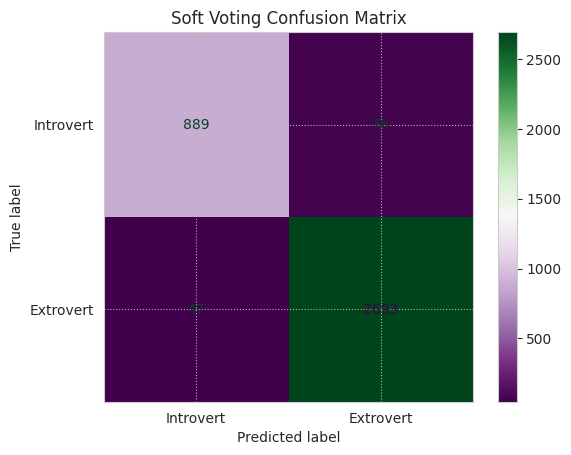


Stacking Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.92      0.94       965
           1       0.97      0.98      0.98      2740

    accuracy                           0.97      3705
   macro avg       0.96      0.95      0.96      3705
weighted avg       0.97      0.97      0.97      3705



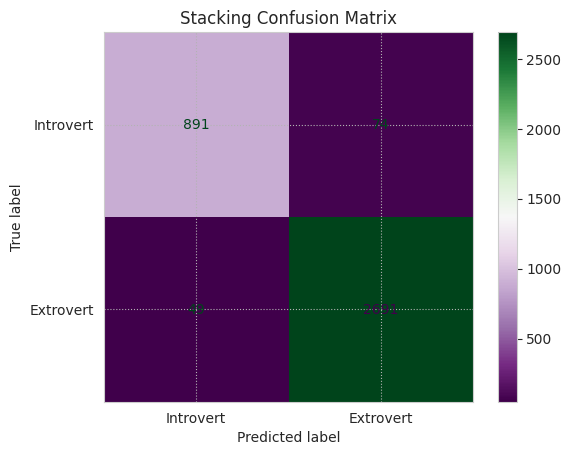

In [28]:
def evaluate_model(name, y_true, y_pred):
    print(f"\n{name} Classification Report:")
    print(classification_report(y_true, y_pred))
    ConfusionMatrixDisplay.from_predictions(y_true, y_pred, display_labels=['Introvert', 'Extrovert'], cmap="PRGn")
    plt.title(f"{name} Confusion Matrix")
    plt.show()

evaluate_model("Soft Voting", y_val, voting_preds)
evaluate_model("Stacking", y_val, stacking_preds)

# <span style="color:transparent;">Select Best Ensemble & Create Submission</span>

<div style="border-radius: 15px; border: 2px solid #6A1B9A; padding: 10px; background: linear-gradient(135deg, #9C27B0, #4CAF50); text-align: center; box-shadow: 0px 4px 8px rgba(0, 0, 0, 0.5);">
    <h1 style="color: #ffffff; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7); font-weight: bold; margin-bottom: 5px; font-size: 28px; font-family: 'Roboto', sans-serif;">
        Select Best Ensemble & Create Submission
    </h1>
</div>

<!-- Include Google Fonts for a modern font -->
<link href="https://fonts.googleapis.com/css2?family=Roboto:wght@700&display=swap" rel="stylesheet">


In [29]:
if stack_val_acc >= soft_val_acc:
    best_method = "Stacking"
    print(f"\nUsing Stacking Ensemble for Final Submission (Val Acc: {stack_val_acc:.4f})")
    final_test_probs = meta_model.predict_proba(test_preds)[:, 1]
else:
    best_method = "Soft Voting"
    print(f"\nUsing Soft Voting Ensemble for Final Submission (Val Acc: {soft_val_acc:.4f})")
    voting.fit(X, y)
    final_test_probs = voting.predict_proba(X_test)[:, 1]

final_preds = (final_test_probs >= best_thresh).astype(int)
submission = pd.DataFrame({'id': test_ID, 'Personality': final_preds})
submission['Personality'] = submission['Personality'].map({1: 'Extrovert', 0: 'Introvert'})
submission_file = f"submission_{best_method.lower()}.csv"
submission.to_csv(submission_file, index=False)

print(f"\nFinal Submission saved as '{submission_file}' using {best_method} Ensemble!")


Using Stacking Ensemble for Final Submission (Val Acc: 0.9668)

Final Submission saved as 'submission_stacking.csv' using Stacking Ensemble!


## Test Set Prediction Distribution


Test Set Prediction Distribution:
Personality
Extrovert    4627
Introvert    1548
Name: count, dtype: int64


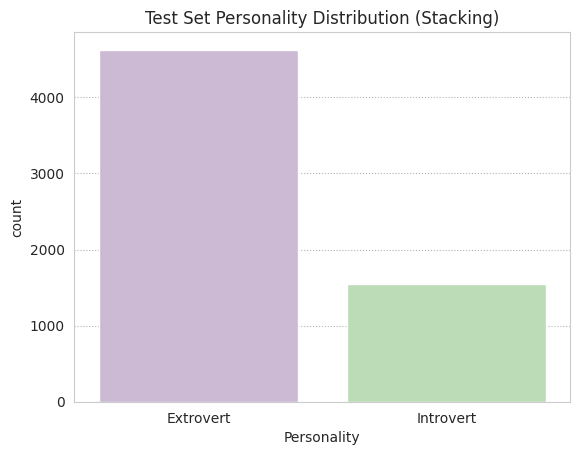

In [30]:
print("\nTest Set Prediction Distribution:")
print(submission['Personality'].value_counts())
sns.countplot(data=submission, x='Personality', palette='PRGn')
plt.title(f"Test Set Personality Distribution ({best_method})")
plt.show()

In [31]:
# Final Output
print("\nWorkflow completed successfully!")
display(submission.head())


Workflow completed successfully!


,id,Personality
0,18524,Extrovert
1,18525,Introvert
2,18526,Extrovert
3,18527,Extrovert
4,18528,Introvert


<!-- Google Fonts for Roboto -->
<link href="https://fonts.googleapis.com/css2?family=Roboto:wght@700&display=swap" rel="stylesheet">

<div style="
    border-radius: 15px;
    border: 2px solid #762a83;
    padding: 20px;
    background: linear-gradient(135deg, #e7d4e8, #d9f0d3);
    font-family: 'Roboto', sans-serif;
    box-shadow: 0 4px 8px rgba(0,0,0,0.2);
">
  <h4 style="color:#40004b; font-weight:700; margin-bottom:15px;"> Acknowledgements</h4>
  <p style="font-size:15px; color:#333;"> 
  <a href="https://www.kaggle.com/hzning" style="color:#762a83; text-decoration:underline;">
    @hzning -
  </a>  
  <a href="https://www.kaggle.com/code/hzning/top-3-solution-0-976518-easy-is-all-you-need" style="color:#762a83; text-decoration:underline;">
    🔥 Top 3% Solution|🏆 0.976518, easy is all you need
  </a>
</p>

  <h4 style="color:#40004b; font-weight:700; margin-top:30px; margin-bottom:16px;">References</h4>
  <ul style="color:#333; font-size:15px;">
    <li><a href="https://www.kaggle.com/competitions/playground-series-s5e7/data" style="color:#762a83;">Kaggle Playground Series – S5E7</a></li>
    <li><a href="https://www.kaggle.com/datasets/jaxa623/extrovert-vs-introvert-behavior-data-backup" style="color:#762a83;">Extrovert vs. Introvert Behavior Data (Backup Dataset)</a></li>
  </ul>

  <h4 style="color:#40004b; font-weight:700; margin-top:30px; margin-bottom:16px;">Citation</h4>
  <p style="font-size:15px; color:#333;">
    Walter Reade and Elizabeth Park. <strong>Predict the Introverts from the Extroverts.</strong><br/>
    <a href="https://kaggle.com/competitions/playground-series-s5e7" style="color:#762a83; text-decoration:underline;">Kaggle Competition Playground Series S5E7, 2025.</a>
  </p>
</div>


<div style="border-radius: 15px; border: 2px solid #6A1B9A; padding: 20px; background: linear-gradient(135deg, #9C27B0, #4CAF50); text-align: center; box-shadow: 0px 4px 8px rgba(0, 0, 0, 0.5);">
    <h1 style="color: #ffffff; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7); font-weight: bold; margin-bottom: 10px; font-size: 28px; font-family: 'Roboto', sans-serif;">
        🙏 Thanks for Reading! 🚀
    </h1>
    <p style="color: #ffffff; font-size: 18px; text-align: center;">
        Happy Coding! 🙌😊
    </p>
</div>

<!-- Include Google Fonts for a modern font -->
<link href="https://fonts.googleapis.com/css2?family=Roboto:wght@700&display=swap" rel="stylesheet">